# Testing Simple Laplace Algorithm for $\varepsilon$-DP

In [29]:
# Load the libraries we need.
import matplotlib.pyplot as plt
import math
import numpy as np
from IPython.display import HTML, display
import tabulate
import pandas as pd
from IPython.display import display, Math # Support LaTeX-formatted outputs.

# Basic Setup for Laplace Distribution

$PDF_{Laplace}=\frac{1}{2b}e^{\frac{-\left|x-\mu\right|}{b}}$

$\mu=$ Location

$b=$ Scale $=\frac{Sensitivity}{\varepsilon}$

Typically in DP usage we set the location, $\mu$, to 0. This leaves us with:

$PDF_{Laplace}=\frac{1}{2b}e^{\frac{-\left|x\right|}{b}}$

In [52]:
# Set the parameter for the privacy mechanism.
epsilon=2.
sensitivity=1.
scale=sensitivity/epsilon

print("Epsilon: %f" % epsilon)
print("Sensitivity: %f" % sensitivity)
print("Scale: %f" % scale)

# TODO: Try to do a better job of displaying the equation once the parameters have been entered.

display(Math(r'PDF_{Laplace}=\frac{1}{2b}e^{\frac{-\left|x-\mu\right|}{b}}'))

# Examples that may show the way. Core problem is mixing variable insertion and LaTeX layout.
display(Math(r'a_{test} +' + ' {}'.format(scale)))
a=12.34
b=23.45
P=100.01
V=99.98

display(Math(r'Dims: {}x{}m \\ Area: {}m^2 \\ Volume: {}m^3'.format(a, round(b,2), P, V)))

Epsilon: 2.000000
Sensitivity: 1.000000
Scale: 0.500000


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Define parameters for sampling

In [60]:

# Parameters for the data
minval=1
maxval=10
numsamples=10000


# Create Laplace Noise

Using 50 bins


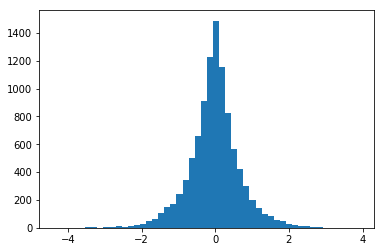

In [61]:
# Generate the noise 
noise = np.random.laplace(0,sensitivity/epsilon,numsamples)

# Display an histogram of the noise
histbincnt=max(20,min(numbins/100,50))
print("Using %d bins" % histbincnt)
histnoise=plt.hist(noise,histbincnt)


# Create some random data

Using 50 bins


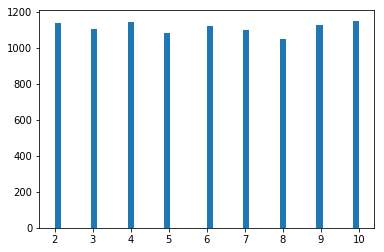

In [62]:
# Create a random dataset.
x = np.ceil(np.random.uniform(minval,maxval,numsamples))

# Display an histogram of the data
histbincnt=max(20,min(numbins/100,50))
print("Using %d bins" % histbincnt)
histdata=plt.hist(x,histbincnt)


# Create Noisy Data

Using 50 bins


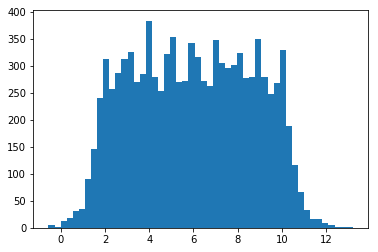

In [63]:
y = x + noise

# Display an histogram of the noisy data
histbincnt=max(20,min(numbins/100,50))
print("Using %d bins" % histbincnt)
histdata=plt.hist(y,histbincnt)

# Calculate L1 Error

In [59]:
L1 = np.linalg.norm(y-x,1)
print("Absolute L1 Error: " + "{:.8}".format(L1))

print("also")
L1rel = L1 / np.linalg.norm(x,1)
print("Relative Error: " + "{:.8%}".format(L1rel))

Absolute L1 Error: 5002.3693
also
Relative Error: 0.09957560%


# Old Code

In [ ]:
bins=[0,10,20,30,40,50,60,70,80,90,101]
x = np.ceil(np.random.uniform(0,100,100))
x1 = np.append(x,52)
print(x1)
x = np.random.laplace(0,1,100)
y = pd.DataFrame(x, columns=["Age"])
y1 = pd.DataFrame(x1, columns=["Age"])
#display(HTML(tabulate.tabulate(y, tablefmt='html')))
#print(y)
#plt.hist(x,bins=bins)
plt.hist(x)

(array([ 7., 10.,  4.,  7.,  3.,  5.,  5.,  4.,  5.,  7.,  5.,  2.,  6.,
         4.,  1.,  5.,  5.,  4.,  4.,  8.]),
 array([  1.  ,   5.95,  10.9 ,  15.85,  20.8 ,  25.75,  30.7 ,  35.65,
         40.6 ,  45.55,  50.5 ,  55.45,  60.4 ,  65.35,  70.3 ,  75.25,
         80.2 ,  85.15,  90.1 ,  95.05, 100.  ]),
 <a list of 20 Patch objects>)

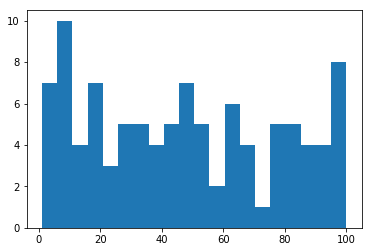

In [68]:
plt.hist(x1,20)
#print(x)